# Analyzing and answer business question using dataset from Ritz-Jager Hotel

##  Overview

You’ve landed a great job with the Ritz-Jager Hotel operator as a data scientist. This hotel operator wants to improve their business efficiency by utilizing their historical data and they want to find out what happened in their previous bookings, knowing their customer better, and optimizing the promo timing.

Your team of engineer have to analyze the data that they have based on the pre-defined questions that your CEO gave.

Questions:
1. Where do the guests come from?
2. How much do guests pay for a room per night?
3. How does the price per night vary over the year?
4. Which are the busiest months?
5. How long do people stay at the hotels?
6. Bookings by market segment
7. How many bookings were cancelled?
8. Which month has the highest number of cancellations?

## Understanding the data

At first, import the necessary packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image

Load the data from given csv file into a pandas dataframe.

In [2]:
hotel_df = pd.read_csv('Ritz_Jager_Data.csv')
hotel_df_shape = hotel_df.shape
print('load the data')
print('the data has {} observations and {} features'.format(hotel_df_shape[0],
                                                            hotel_df_shape[1]))
print('*'*75)
print('first five rows of the data:')
hotel_df.head()


load the data
the data has 119390 observations and 32 features
***************************************************************************
first five rows of the data:


,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [3]:
print('column in dataset')
hotel_df.columns.values

column in dataset


array(['hotel_type', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'meal_type', 'country_origin', 'market_segment',
       'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'], dtype=object)

In [4]:
print('datatype information')
hotel_df.info()

datatype information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel_type                        119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal_type                         119390 non-null object
country_origin                    118902 non-null object
market_segment                    119390 non-null object
distribution_channel 

This data set contains booking information for Ritz Jager Hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

more details:
1. This dataset consist of 119390 rows and 32 columns
2. dataset has 2 float columns, 16 integer columns and 32 object columns
2. the data doesn't have columns that contain unique id for each rows but Data is divided into 2 types, which data from Resort Hotel and City Hotel
3. Data also  divided into 2 types to find which customer have canceled their booking  and which customer that booking more than one time
4. The description of each column can be found in the file 'data_dictionary_Ritz_Jager.xlsx' or you can use [this link](https://github.com/irhamnaj/project/blob/master/data_dictionary_Ritz_Jager.xlsx)

## Prepocessing

Let us check for missing values in each column.

In [5]:
count_missing = hotel_df.isnull().sum().sort_values(ascending=False)
percent_missing = ((hotel_df.isnull().sum())/len(hotel_df) * 100).sort_values(
    ascending=False)

missing_data = pd.concat([count_missing, percent_missing], axis=1,
                         keys=['count missing', 'percent missing'])

print('count and percentage missing value on ritz-jager dataset is: ')
missing_data.head(10)


count and percentage missing value on ritz-jager dataset is: 


,count missing,percent missing
company,112593,94.306893
agent,16340,13.686238
country_origin,488,0.408744
children,4,0.003350
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
is_canceled,0,0.000000
market_segment,0,0.000000


In [6]:
#check unique value in agent columns
len(hotel_df['agent'].unique())

334

Observations:
1. there is a lot of missing values in company and agent columns
2. As we can see,  94.31 % of company columns are missing values. therefore, there is no change to remove or fill the missing value with mode of the data, the best solution is drop the columns
3. 13.68 % of data in agent columns are missing values. Since there was 334 unique value in agent columns (make it not predictable), i will choose to drop the columns
4. for country_origin, since there was no information in other column that can be use to fill the missing value in country origin. replace null values with 'Unknown' is the best choice
5. We have also 4 missing values in children column. If there is no information about children, In my opinion those customers do not have any children.


In [7]:
# fill nul values with 0
hotel_df['children'] = hotel_df['children'].fillna(0)

for country origin, i will fill missing value with unknown

In [8]:
hotel_df['country_origin'] = hotel_df['country_origin'].fillna('unknown')

the last is drop company and agent columns

In [9]:
hotel_df = hotel_df.drop(['company','agent'], axis=1)

check the data

In [10]:
hotel_df.isnull().sum()

hotel_type                        0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal_type                         0
country_origin                    0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Explanatory data analysis (EDA)

In this part, i will try to answering business questions such as
1. Where do the guests come from?
2. How much do guests pay for a room per night?
3. How does the price per night vary over the year?
4. Which are the busiest months?
5. How long do people stay at the hotels?
6. Bookings by market segment
7. How many bookings were cancelled?
8. Which month has the highest number of cancellations?

with focus on 3 things (all ritz jaeger dataset and separate hotel_type)

In [11]:
#to know actual number of hotel's visitor choose only customer with no cancel booking
df_hotel_no_cancel = hotel_df[hotel_df['is_canceled'] == 0]

### 1. Where do the guests come from?

In [57]:
#to make more accurate, choose data with no repeated guest
country_count = df_hotel_no_cancel[
    df_hotel_no_cancel['is_repeated_guest'] ==0][
    'country_origin'].value_counts()

#create dataframe
country_count = pd.DataFrame(country_count).reset_index()
country_count.rename(columns={"index": "country",
                              "country_origin":"number of guests"},
                     inplace=True)

#change iso country with name country
import pycountry

#list the name country
list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]
list_alpha_3 = [i.alpha_3 for i in list(pycountry.countries)]    

#create function
def country_flag(df):
    if (len(df['country'])==2 and df['country'] in list_alpha_2):
        return pycountry.countries.get(alpha_2=df['country']).name
    elif (len(df['country'])==3 and df['country'] in list_alpha_3):
        return pycountry.countries.get(alpha_3=df['country']).name
    else:
        return 'Invalid Code'

country_count['country_name']=country_count.apply(country_flag, axis = 1)

#re order columns
new_col = ['country_name','country','number of guests']
country_count.index = country_count['country']
country_count = country_count[new_col].drop('country',axis=1)

#input percent country
country_count['percent country'] = round((
    country_count['number of guests'] / len(df_hotel_no_cancel) * 100),2)
#concat the data with percent country

print('guest of hotel came from {} countries'.format(len(country_count)))
country_count.head(20)

guest of hotel came from 166 countries


,country_name,number of guests,percent country
country,,,
PRT,Portugal,18347,24.41
GBR,United Kingdom,9570,12.73
FRA,France,8409,11.19
ESP,Spain,6307,8.39
DEU,Germany,6044,8.04
IRL,Ireland,2514,3.34
ITA,Italy,2395,3.19
BEL,Belgium,1852,2.46
NLD,Netherlands,1697,2.26


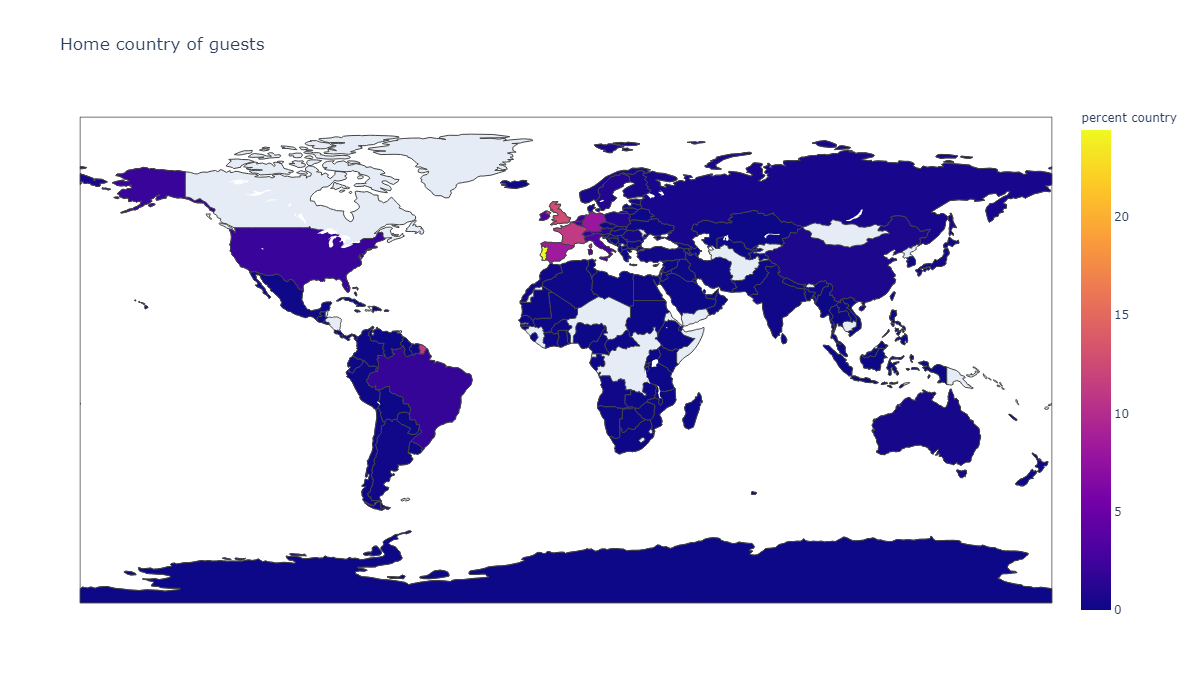

<Figure size 1152x576 with 0 Axes>

In [13]:
#create map
plt.figure(figsize=(16,8))
country_map = px.choropleth(country_count,
                    locations=country_count.index,
                    color=country_count["percent country"], 
                    hover_name=country_count.index, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")

#functio below, to make plotly can generate using pdf latex
image_bytes = country_map.to_image(format='png', width=1200, height=700, scale=1)
Image(image_bytes)

Insight:
1. guest from 166 countries have stayed in that hotel
2. most of the guests came from country in europe which is portugal, UK, france, germany has the highest number of guests

### 2. How much do guests pay for a room per night?

to get guest pay, we sould divided adr with total guest, but we found that some of guests (adult and children columns) have 0 value, so to avoid failure when we divided between adr and total guest, i will choose row with adult > 0 and children > 0

In [29]:
df_hotel_no_zero_guest = df_hotel_no_cancel[(df_hotel_no_cancel.loc[:,'adults'] > 0) & (df_hotel_no_cancel.loc[:,'children'] > 0)]

#create total guests columns
df_hotel_no_zero_guest.loc[:,'total guests'] = df_hotel_no_zero_guest.loc[:,'adults'] + df_hotel_no_zero_guest.loc[:,'children']

#create guest pay columns
df_hotel_no_zero_guest.loc[:,'guests pay'] = df_hotel_no_zero_guest.loc[:,'adr'] / df_hotel_no_zero_guest.loc[:,'total guests']

#separated into two type hotel
df_resort_hotel = df_hotel_no_zero_guest[df_hotel_no_zero_guest.loc[:,'hotel_type'] == 'Resort Hotel']
df_city_hotel = df_hotel_no_zero_guest[df_hotel_no_zero_guest.loc[:,'hotel_type'] == 'City Hotel']

In [30]:
guest_pay = round(df_hotel_no_zero_guest['guests pay'].mean(),2)
resort_hotel_pay = round(df_resort_hotel['guests pay'].mean(),2)
city_hotel_pay = round(df_city_hotel['guests pay'].mean(),2)

print('''average guest pay for a room per night is {0} Dollars in all hotels type,
    {1} dollars in resort hotel and {2} dollars in city hotel'''.format(
    guest_pay, resort_hotel_pay, city_hotel_pay))

average guest pay for a room per night is 45.83 Dollars in all hotels type,
    46.24 dollars in resort hotel and 45.56 dollars in city hotel


after that i try to divided data depends on room type, because different room type, different service

In [31]:
#divided to room type
df_room_type = df_hotel_no_zero_guest.groupby('reserved_room_type')['guests pay'].mean()
df_room_types = pd.DataFrame(df_room_type).sort_values('guests pay').reset_index()
df_room_types

,reserved_room_type,guests pay
0,B,36.075011
1,A,42.092443
2,C,44.062646
3,H,46.544240
4,D,47.479330
5,G,48.317583
6,F,50.017510
7,E,50.159725


Insight:
    1. room type E has the highest price with 50 dollars per night when room type B has the lowest price with 36 dollars per night

### 3. How does the price per night vary over the year?

in this analysis i choose only data with no zero guests and no cancel booking

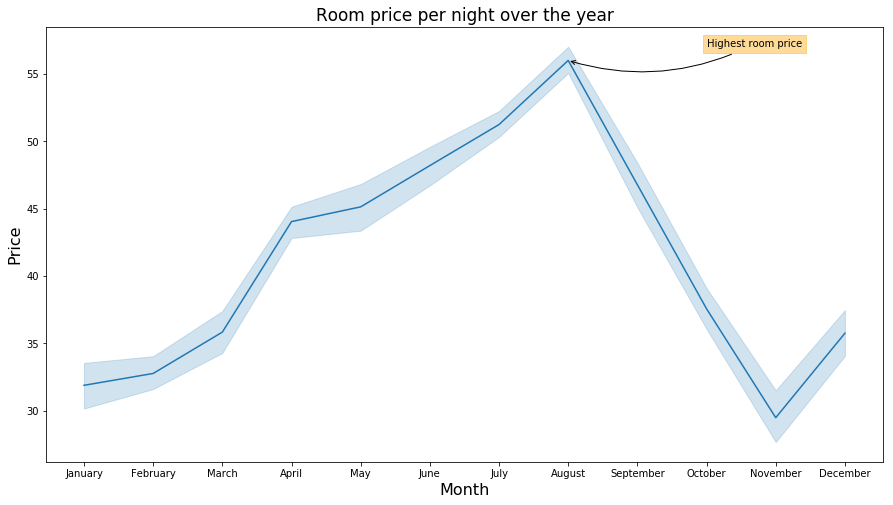

In [52]:
data_per_month = df_hotel_no_zero_guest.loc[:,[
    'hotel_type','arrival_date_month','guests pay']]

#ordered the month
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

data_per_month.loc[:,'arrival_date_month'] = pd.Categorical(
    data_per_month.loc[:,'arrival_date_month'],
    categories=ordered_months)

#plot the data
plt.figure(figsize=(15, 8))
ax = sns.lineplot(x = "arrival_date_month", y="guests pay", data=data_per_month)
plt.title("Room price per night over the year", fontsize=17)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Price", fontsize=16)

plt.annotate("Highest room price", xy=('August', 56), xytext=('October', 57),
             arrowprops={'arrowstyle':'->', 'color': 'black', 
                         "connectionstyle":"arc3,rad=-0.2"},
             bbox={'pad':4, 'edgecolor':'orange', 'facecolor': 
                   'orange', 'alpha':0.4})

plt.show()

Insight:
    1. The line charts above depicts that the prices in the hotel become much higher during the summer (june-july august) and reach the peak at august
    2. after the peak, the price of the hotels became decrease and reach the lowest price in the start of winter (november)

for hotel type

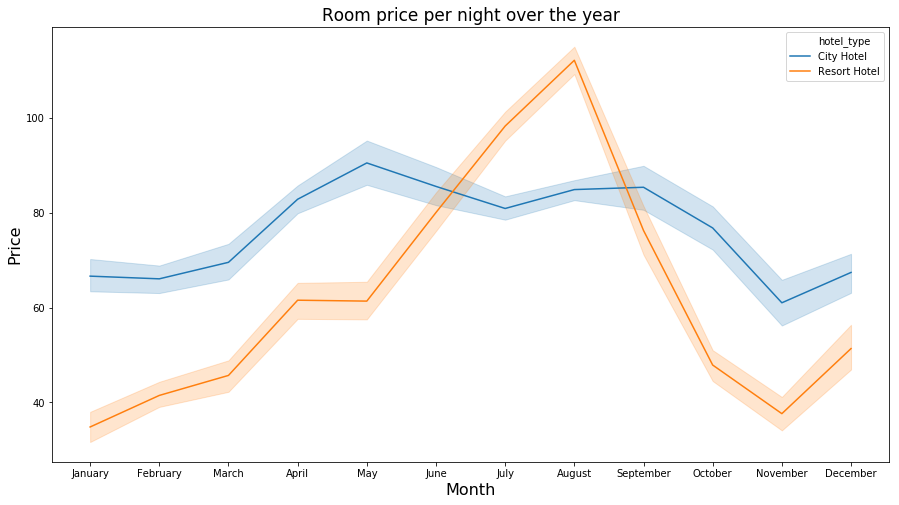

In [18]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = "arrival_date_month", y="guests pay",
             hue='hotel_type',
             data=data_per_month,
             hue_order = ["City Hotel", "Resort Hotel"])
plt.title("Room price per night over the year", fontsize=17)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

Insight:
    1. It is clear that City hotel has less price between may until august than Resort hotel
    2. City hotel prices became slightly higher in May(spring) and september(autumn) when resort hotel have the higher price in august(summer).  
    3. the prices of city hotels start to decreas after september until november, when resort hotel start to decreas after august until november
    4. event both city hotels and resort has lowest price in november, city hotels still have more higher price than resort hotels

### 4. Which are the busiest months?

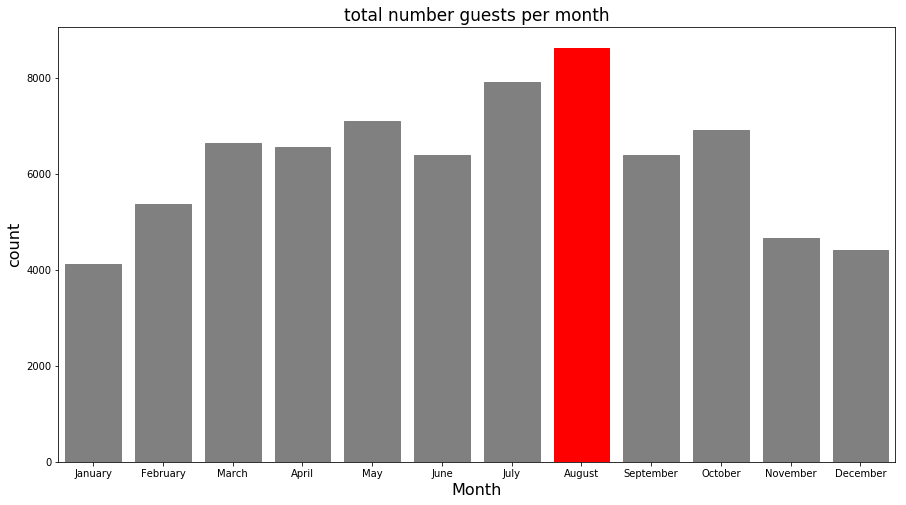

In [19]:
#count guests depends on arrival_date_month
total_guests_per_month = df_hotel_no_cancel['arrival_date_month'].value_counts()

#create new dataframe
total_guests_per_month = pd.DataFrame(total_guests_per_month).reset_index()
total_guests_per_month.rename(
    columns={"index": "arrival_date_month",
             "arrival_date_month":"number of guests"},
    inplace=True)

#ordered the month
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

total_guests_per_month.loc[:,'arrival_date_month'] = pd.Categorical(
    total_guests_per_month.loc[:,'arrival_date_month'],
    categories=ordered_months)

#plot the data
plt.figure(figsize=(15, 8))
ax = sns.barplot(x = "arrival_date_month",
                 y="number of guests",
                 data=total_guests_per_month)
plt.title("total number guests per month", fontsize=17)
plt.xlabel("Month", fontsize=16)
plt.ylabel("count", fontsize=16)

for bar in ax.patches:
    if bar.get_height() == max(total_guests_per_month['number of guests']):
        bar.set_color('red')    
    else:
        bar.set_color('grey')
plt.show()

Insight:
1. The busiest month came from july to august (summer season) and the line chart reach the peak at august, this insight may be causing by summer season, which is identical with holiday.

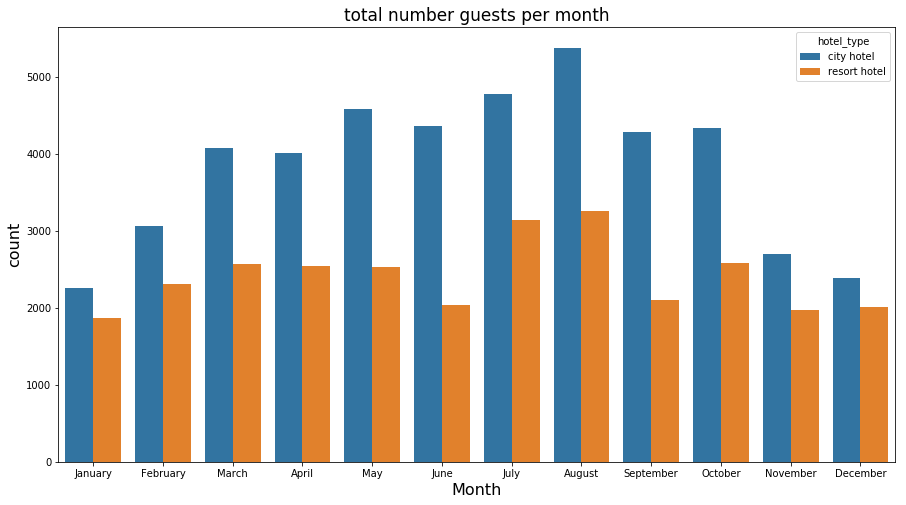

In [56]:
# visualize data per hotel_type
resort_hotel = df_hotel_no_cancel[
    df_hotel_no_cancel['hotel_type'] == 'Resort Hotel']
city_hotel = df_hotel_no_cancel[
    df_hotel_no_cancel['hotel_type'] == 'City Hotel']

#count the data
resort_guests_per_month = resort_hotel['arrival_date_month'].value_counts()
city_guests_per_month = city_hotel['arrival_date_month'].value_counts()

#create dataframe
resort_guests_per_month = pd.DataFrame(resort_guests_per_month).reset_index()
resort_guests_per_month.rename(
    columns={"index": "arrival_date_month",
             "arrival_date_month":"number of guests"},
    inplace=True)
resort_guests_per_month['hotel_type'] = 'resort hotel' 

city_guests_per_month = pd.DataFrame(city_guests_per_month).reset_index()
city_guests_per_month.rename(
    columns={"index": "arrival_date_month",
             "arrival_date_month":"number of guests"},
    inplace=True)
city_guests_per_month['hotel_type'] = 'city hotel' 

#concat the data
all_hotel_type_guests = pd.concat(
    [resort_guests_per_month, city_guests_per_month],
    ignore_index=True)

#ordered the month
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

all_hotel_type_guests.loc[:,'arrival_date_month'] = pd.Categorical(
    all_hotel_type_guests.loc[:,'arrival_date_month'],
    categories=ordered_months)

#plot the data
plt.figure(figsize=(15, 8))
ax = sns.barplot(x = "arrival_date_month",
                 y="number of guests",
                 hue='hotel_type',
                 hue_order = ["city hotel", "resort hotel"],
                 data=all_hotel_type_guests)
plt.title("total number guests per month", fontsize=17)
plt.xlabel("Month", fontsize=16)
plt.ylabel("count", fontsize=16)

plt.show()

Insight:
1. city hotel likely to have more total guest than resort hotel
2. both of hotel reach the peak at the july - august or at the summer seasons which is identical with holiday

### 5. How long do people stay at the hotels?

In [33]:
#choose only data that contain number of stays
data_stay = df_hotel_no_cancel.loc[:,['hotel_type','stays_in_weekend_nights', 'stays_in_week_nights']]

#create total stays columns per customers
data_stay['total_stays_customers'] = data_stay.loc[:,'stays_in_weekend_nights'] + data_stay.loc[:,'stays_in_week_nights']

#split the data to find average stays in resort_hotel and city_hotel
resort_hotel = data_stay[data_stay['hotel_type'] == 'Resort Hotel']
city_hotel = data_stay[data_stay['hotel_type'] == 'City Hotel']

#print the average
avg_all = round(data_stays_customers['total_stays_customers'].mean(),2)
avg_resort = round(resort_hotel['total_stays_customers'].mean(),2)
avg_city = round(city_hotel['total_stays_customers'].mean(),2)
print('''on average, guests stay at hotels is {} nights,
        resort hotels is {} nights and city hotels is {}'''.format(avg_all, avg_resort, avg_city))

on average, guests stay at hotels is 3.39 nights,
        resort hotels is 4.14 nights and city hotels is 2.92


Insight:
1. it is clear that on average, guest stay 3 nights for all hotel, 4 nights in resort hotel and 2-3 nights in city hotels

### 6. Bookings by market segment

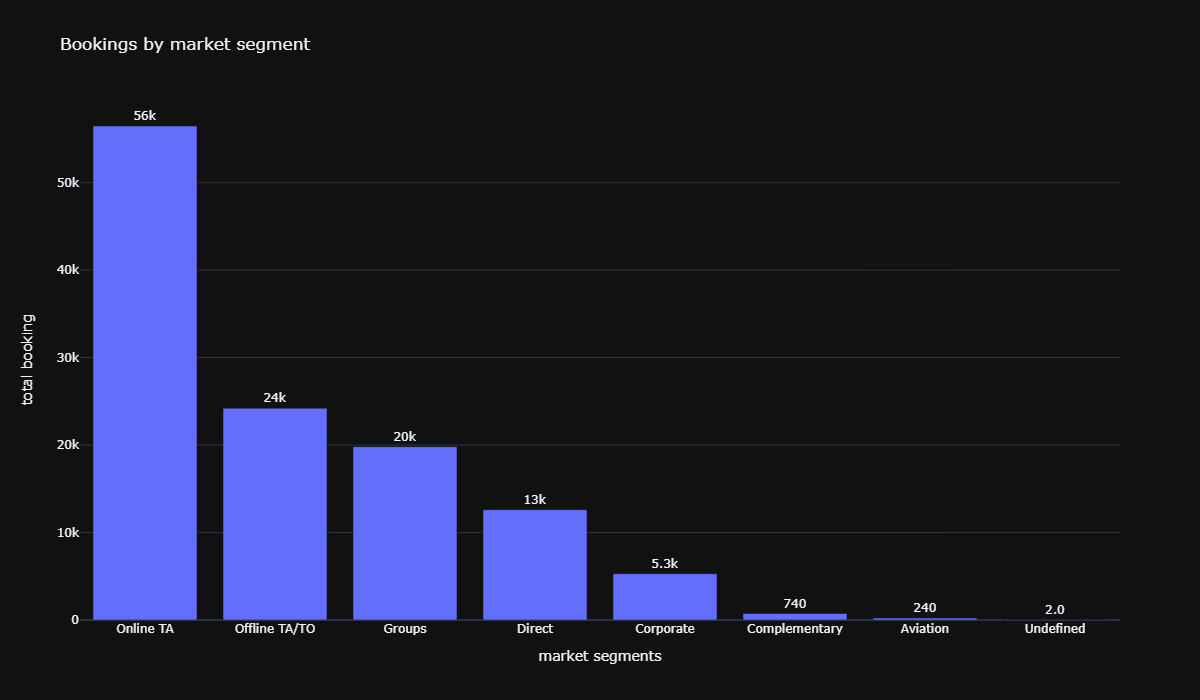

In [23]:
market_segments = hotel_df['market_segment'].value_counts().reset_index()
market_segments.rename(
    columns={'index':'market segments', 
             'market_segment': 'total booking'},
    inplace=True)

fig = px.bar(market_segments,
            x = 'market segments',
            y = 'total booking',
            title = 'Bookings by market segment',
            text='total booking',
            template= "plotly_dark")

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

#create image from plotly
image_bytes1 = fig.to_image(format='png', width=1200, height=700, scale=1)
Image(image_bytes1)

Insight:
1. it is clearly that online TA is the highest market segments with at least 56000 bookings, when (avoid undefined) Aviation has the lowest total booking with only 240 bookings

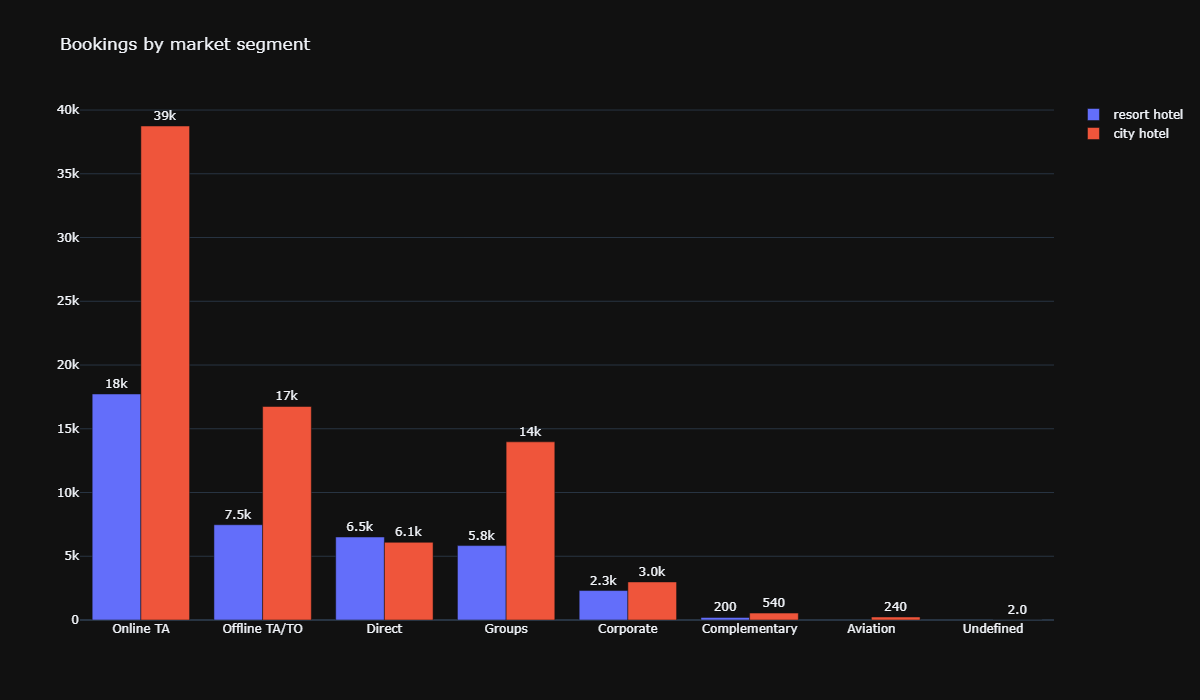

In [3]:
# visualize data per hotel_type
resort_hotel = hotel_df[hotel_df['hotel_type'] == 'Resort Hotel']
city_hotel = hotel_df[hotel_df['hotel_type'] == 'City Hotel']

#markets segments
market_segments_resort = resort_hotel[
    'market_segment'].value_counts().reset_index()
market_segments_resort.rename(
    columns={'index':'market segments',
             'market_segment': 'total booking'},
    inplace=True)

market_segments_city = city_hotel[
    'market_segment'].value_counts().reset_index()
market_segments_city.rename(
    columns={'index':'market segments',
             'market_segment': 'total booking'},
    inplace=True)

#plot the data
trace1 = go.Bar(
    x=market_segments_resort['market segments'],
    y=market_segments_resort['total booking'],
    name='resort hotel',
    text=market_segments_resort['total booking'],
    texttemplate='%{text:.2s}',
    textposition='outside'
)
trace2 = go.Bar(
    x=market_segments_city['market segments'],
    y=market_segments_city['total booking'],
    name='city hotel',
    text=market_segments_city['total booking'],
    texttemplate='%{text:.2s}',
    textposition='outside'
)

data = [trace1, trace2]
layout = go.Layout(
    title=go.layout.Title(text="Bookings by market segment"),
    barmode='group',
    template= "plotly_dark"
)

fig = go.Figure(data=data,
                layout=layout)

image_bytes2 = fig.to_image(format='png', width=1200, height=700, scale=1)
Image(image_bytes2)

Insight:
    1. city hotel has more highest number bookings per segment, except from Direct
    2. Online TA has the highest total booking in both city hotel and resort hotel

### 7. How many bookings were cancelled?

In [37]:
#create new dataset contain data with canceled booking
df_hotel_canceled = hotel_df[hotel_df['is_canceled']== 1]
percent_canceled = round(len(df_hotel_canceled) / len(hotel_df) * 100,2)

#split between two hotel type
resort_hotel = df_hotel_canceled[df_hotel_canceled['hotel_type']== 'Resort Hotel']
city_hotel = df_hotel_canceled[df_hotel_canceled['hotel_type'] == 'City Hotel']

#calculate percent canceled
percent_canceled_resort = round(len(resort_hotel) / len(hotel_df) * 100,2)
percent_canceled_city = round(len(city_hotel) / len(hotel_df) * 100,2)

print('''total guests who canceled their booking is  {} guests or {} % from total bookings
            in resort hotel, total bookings canceled is {} guests or {} % from total bookings
            and city hotel has total bookings canceled {} guests or {} % from total bookings
            '''.format(len(df_hotel_canceled),percent_canceled, len(resort_hotel),percent_canceled_resort,
                       len(city_hotel), percent_canceled_city))

total guests who canceled their booking is  44224 guests or 37.04 % from total bookings
            in resort hotel, total bookings canceled is 11122 guests or 9.32 % from total bookings
            and city hotel has total bookings canceled 33102 guests or 27.73 % from total bookings
            


 ### 8. Which month has the highest number of cancellations?

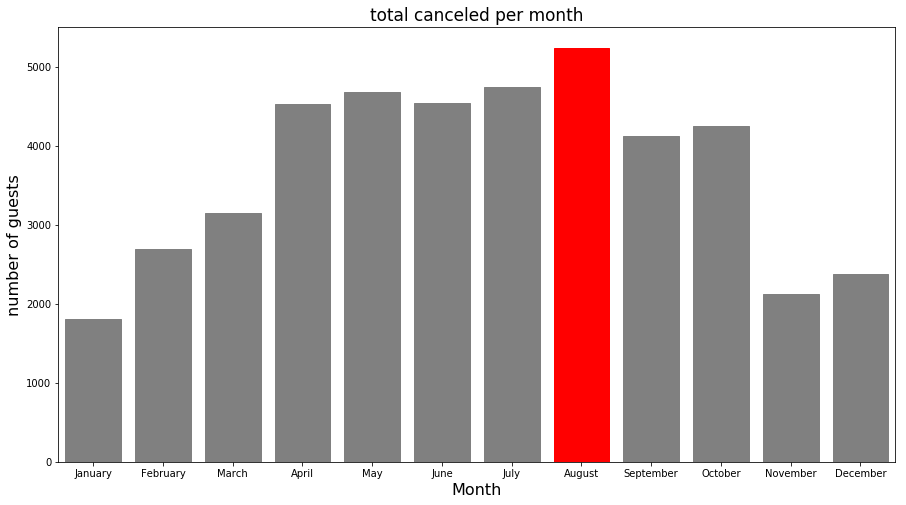

In [26]:
total_canceled_per_month = df_hotel_canceled['arrival_date_month'].value_counts()

#create new dataframe
total_canceled_per_month = pd.DataFrame(
    total_canceled_per_month).reset_index()
total_canceled_per_month.rename(
    columns={"index": "arrival_date_month",
             "arrival_date_month":"number of guests"},
                                inplace=True)

#ordered the month
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

total_canceled_per_month.loc[:,
                             'arrival_date_month'] = pd.Categorical(
    total_canceled_per_month.loc[:,'arrival_date_month'],
    categories=ordered_months)


#plot the data
plt.figure(figsize=(15, 8))
ax = sns.barplot(x = "arrival_date_month",
                 y="number of guests",
                 data=total_canceled_per_month)
plt.title("total canceled per month", fontsize=17)
plt.xlabel("Month", fontsize=16)
plt.ylabel("number of guests", fontsize=16)

for bar in ax.patches:
    if bar.get_height() > 5000:
        bar.set_color('red')    
    else:
        bar.set_color('grey')

plt.show()

Insight:
1. august have the highest number of cancellation (summer season)

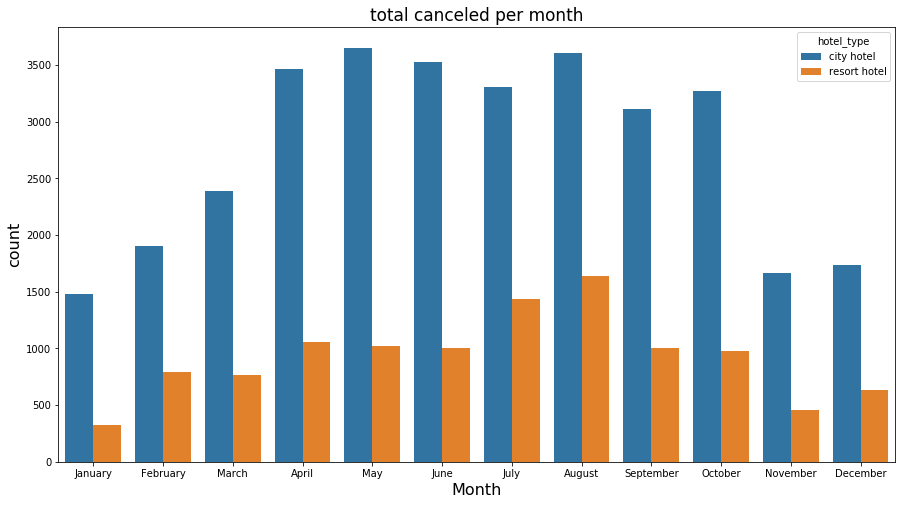

In [27]:
# visualize data per hotel_type
resort_hotel = df_hotel_canceled[df_hotel_canceled['hotel_type'] == 'Resort Hotel']
city_hotel = df_hotel_canceled[df_hotel_canceled['hotel_type'] == 'City Hotel']

#count the data
resort_guests_per_month = resort_hotel['arrival_date_month'].value_counts()
city_guests_per_month = city_hotel['arrival_date_month'].value_counts()

#create dataframe
resort_guests_per_month = pd.DataFrame(resort_guests_per_month).reset_index()
resort_guests_per_month.rename(
    columns={"index": "arrival_date_month",
             "arrival_date_month":"number of guests"},
    inplace=True)
resort_guests_per_month['hotel_type'] = 'resort hotel' 

city_guests_per_month = pd.DataFrame(
    city_guests_per_month).reset_index()
city_guests_per_month.rename(
    columns={"index": "arrival_date_month",
             "arrival_date_month":"number of guests"},
    inplace=True)
city_guests_per_month['hotel_type'] = 'city hotel' 

#concat the data
all_hotel_type_guests = pd.concat(
    [resort_guests_per_month, city_guests_per_month],
    ignore_index=True)

#ordered the month
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

all_hotel_type_guests.loc[:,
                          'arrival_date_month'] = pd.Categorical(
    all_hotel_type_guests.loc[:,'arrival_date_month'],
    categories=ordered_months)

#plot the data
plt.figure(figsize=(15, 8))
ax = sns.barplot(x = "arrival_date_month",
                 y="number of guests",
                 hue='hotel_type',
                 hue_order = ["city hotel", "resort hotel"],
                 data=all_hotel_type_guests)
plt.title("total canceled per month", fontsize=17)
plt.xlabel("Month", fontsize=16)
plt.ylabel("count", fontsize=16)


plt.show()

Insight :
1. for the city hotel, highest number of cancelation was happen during spring (May) and summer(august)
2. for the resort hotel, number of cancelation reach the peak during summer(august)

## Conclusion

In this project, i try to analyze booking information dataset from Ritz_Jager dataset. The conclusion are:
1. total guest per month are likely have positive correlation with average price per month, more booking from guests, more high the price of room in the hotels
2. high price for a room in hotels also have positive correlation with total canceled booking per month. This trend maybe caused by some thing, such as no discount or hotel services, the conclusion is, need more research to find right strategies to reduce number of canceled bookings
3. Resort hotel are likely always have less number (like total number guests) than city hotel.